In [1]:
import json
import networkx as nx
import torch
import torch_geometric.transforms as T
from matplotlib import pyplot as plt
from torch_geometric.utils import to_networkx

import glgexplainer.utils as utils
from glgexplainer.local_explainations import read_lattice, lattice_classnames
from glgexplainer.models import LEN, GLGExplainer, LEEmbedder
from gnn4ua.datasets.loader import Targets, GeneralisationModes

In [2]:
DATASET_NAME = Targets.Distributive
generalisation_mode = GeneralisationModes.weak
task = DATASET_NAME
with open(f"config/{DATASET_NAME}_params.json") as json_file:
	hyper_params = json.load(json_file)

In [3]:
adjs_train, edge_weights_train, ori_classes_train, belonging_train, summary_predictions_train, le_classes_train = read_lattice(
	target=task,
	mode=generalisation_mode,
	split='train'
)

adjs_test, edge_weights_test, ori_classes_test, belonging_test, summary_predictions_test, le_classes_test = read_lattice(
	target=task,
	mode=generalisation_mode,
	split='test'
)

device = "cpu"  # torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transform = T.Compose([
	T.NormalizeFeatures(),
])

In [4]:
dataset_train = utils.LocalExplanationsDataset("data_glg", adjs_train, "same",
											   transform=transform,
											   y=le_classes_train,
											   belonging=belonging_train,
											   task_y=ori_classes_train)
dataset_test = utils.LocalExplanationsDataset("data_glg", adjs_test, "same",
											  transform=transform,
											  y=le_classes_test,
											  belonging=belonging_test,
											  task_y=ori_classes_test)

train_group_loader = utils.build_dataloader(dataset_train, belonging_train,
											num_input_graphs=128)
test_group_loader = utils.build_dataloader(dataset_test, belonging_test,
										   num_input_graphs=256)

/Users/luke/PycharmProjects/AI4UA/glgexplainer/utils.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_attr=torch.tensor(t.weight).reshape(-1, 1),


In [5]:
torch.manual_seed(42)
len_model = LEN(hyper_params["num_prototypes"],
				hyper_params["LEN_temperature"],
				remove_attention=hyper_params["remove_attention"]).to(device)
le_model = LEEmbedder(num_features=hyper_params["num_le_features"],
					  activation=hyper_params["activation"],
					  num_hidden=hyper_params["dim_prototypes"]).to(device)
expl = GLGExplainer(len_model,
					le_model,
					device=device,
					hyper_params=hyper_params,
					classes_names=lattice_classnames,
					dataset_name=DATASET_NAME,
					num_classes=len(
						train_group_loader.dataset.data.task_y.unique())
					).to(device)

/Users/luke/.pyenv/versions/L65_Project/lib/python3.11/site-packages/torch_geometric/data/in_memory_dataset.py:284: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


(array([3.], dtype=float32), array([6020]))
[0.9912084  0.00750224]


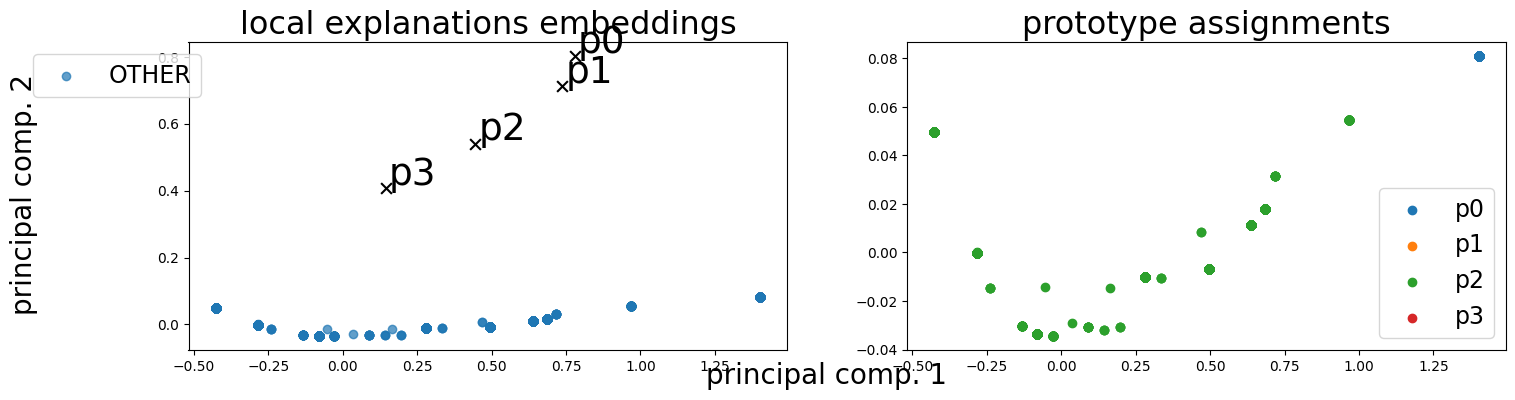

Alpha norms:
tensor([[1.0000, 0.8459, 0.8427, 0.9224],
        [0.8005, 0.7799, 1.0000, 0.8565]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 2]), array([ 141, 5879]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)
  1: Loss: 0.14661, LEN: 0.081149, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.11750, V. LEN 0.078
  2: Loss: 0.10090, LEN: 0.078733, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.10614, V. LEN 0.076
  3: Loss: 0.09072, LEN: 0.076306, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.09574, V. LEN 0.074
  4: Loss: 0.08390, LEN: 0.073914, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.09226, V. LEN 0.071
  5: Loss: 0.07992, LEN: 0.071891, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.08696, V. LEN 0.070
  6: Loss: 0.07603, LEN: 0.069538, Acc: 0.20, V. Acc: 0.29, V. Loss: 0.08332, V. LEN 0.068
  7: Loss: 0.07266, LEN: 0.067117, Acc: 0.55, V. Acc: 0.63, V. Loss: 0.08116, V. LEN 0.067
  8: Loss: 0.06965, LEN: 0.064842, Acc: 0.46, V. Acc: 0.2

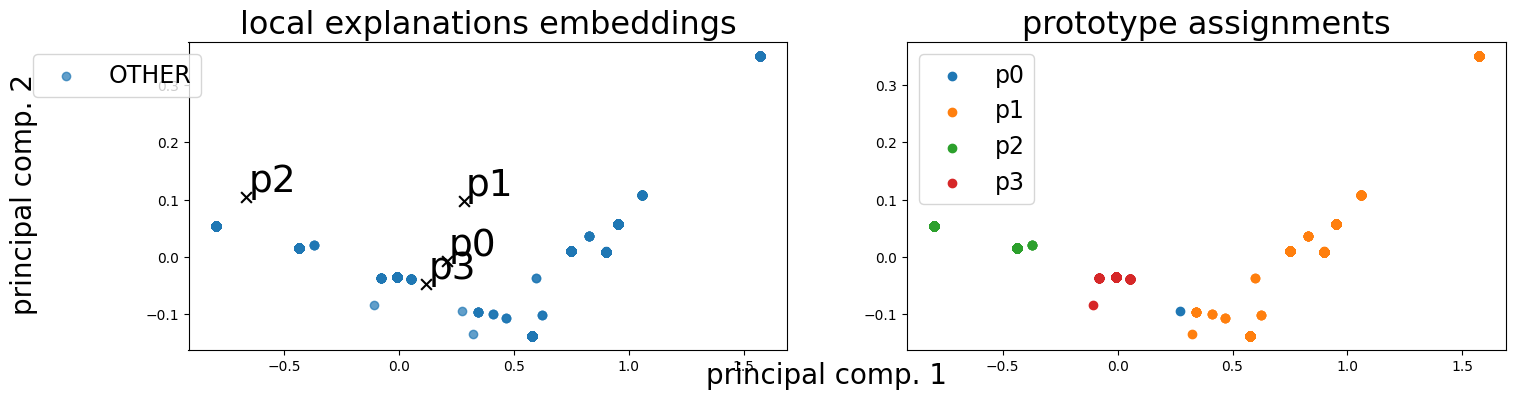

Alpha norms:
tensor([[0.4752, 1.0000, 0.2658, 0.2828],
        [0.3218, 1.0000, 0.5093, 0.3332]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([   1, 1583, 1846, 2590]))
Logic formulas:
For class 0:
0.9622277895548276 ((feature0000000002)
For class 1:
0.9628059356330699 (feature0000000001) | (feature0000000003) | (feature0000000003 & feature0000000001)
Accuracy as classifier:  0.9622
LEN fidelity:  tensor(0.9622)

 20: Loss: 0.02243, LEN: 0.021501, Acc: 0.95, V. Acc: 0.97, V. Loss: 0.02254, V. LEN 0.017
 21: Loss: 0.02108, LEN: 0.020141, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.02230, V. LEN 0.017
 22: Loss: 0.02191, LEN: 0.021051, Acc: 0.95, V. Acc: 0.97, V. Loss: 0.02239, V. LEN 0.017
 23: Loss: 0.02119, LEN: 0.020428, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.02172, V. LEN 0.018
 24: Loss: 0.02153, LEN: 0.020691, Acc: 0.95, V. Acc: 0.97, V. Loss: 0.02164, V. LEN 0.017
 25: Loss: 0.02159, LEN: 0.020736, Acc: 0.95, V. Acc: 0.97, V. Loss: 0.02096, V. LEN

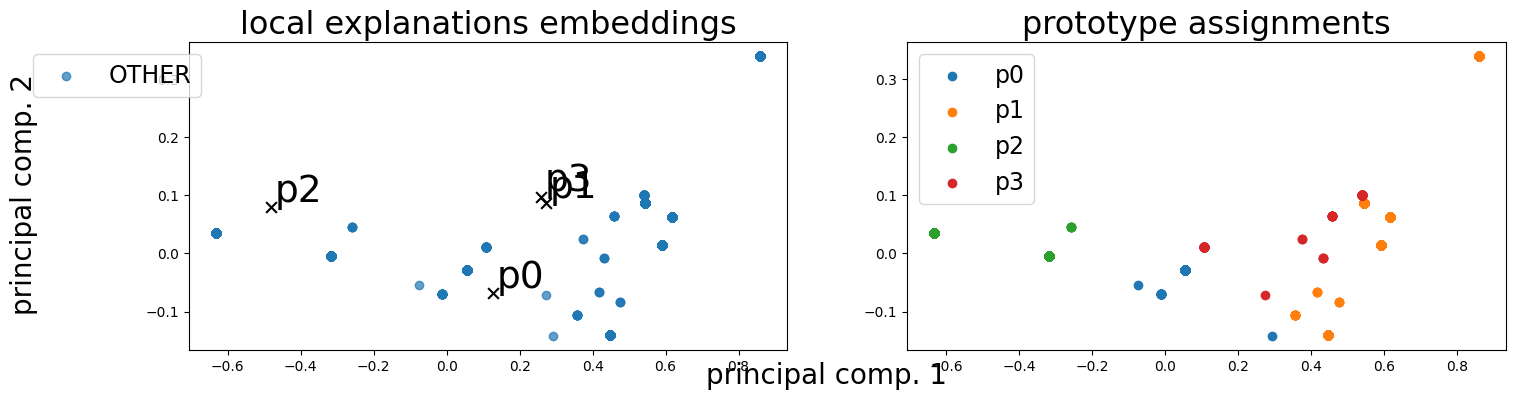

Alpha norms:
tensor([[0.2102, 1.0000, 0.1651, 0.1514],
        [0.3264, 1.0000, 0.3518, 0.3079]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([2543, 1511, 1846,  120]))
Logic formulas:
For class 0:
0.9622277895548276 (feature0000000002)
For class 1:
0.962998650992484 (feature0000000001) | (feature0000000000) | ((feature0000000003) | ((feature0000000003 & feature0000000000)
Accuracy as classifier:  0.9622
LEN fidelity:  tensor(0.9622)

 40: Loss: 0.01974, LEN: 0.019203, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01965, V. LEN 0.017
 41: Loss: 0.02034, LEN: 0.019847, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01997, V. LEN 0.017
 42: Loss: 0.02041, LEN: 0.019848, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01970, V. LEN 0.016
 43: Loss: 0.01996, LEN: 0.019472, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01984, V. LEN 0.017
 44: Loss: 0.01938, LEN: 0.018970, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01984, V. LEN 0.017
 45: Loss: 0.01972, LEN: 0.019226, Acc: 0.96, V. Acc: 0.97, V.

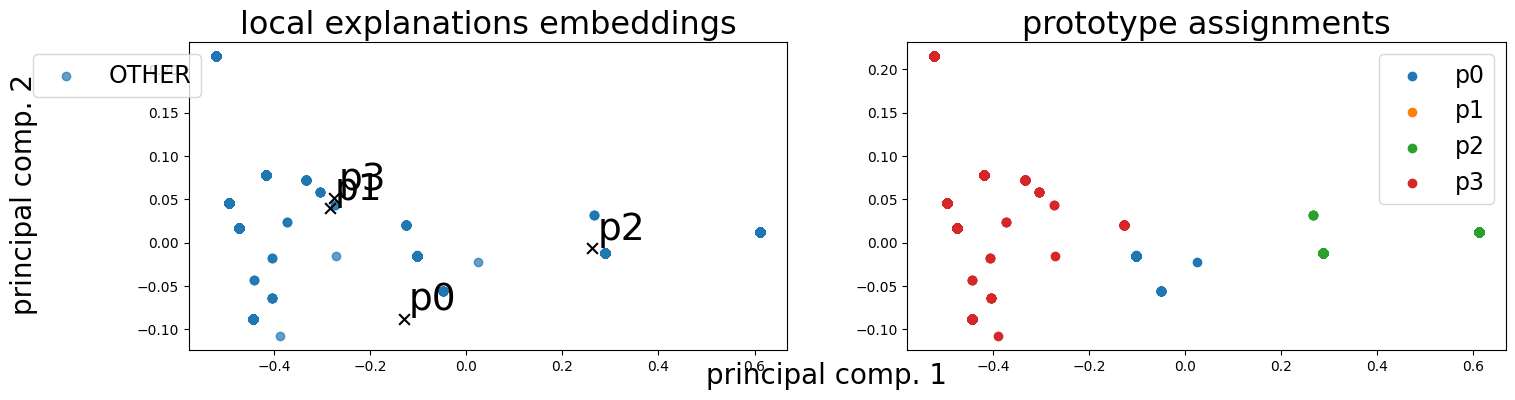

Alpha norms:
tensor([[0.1687, 1.0000, 0.1448, 0.1470],
        [0.4257, 1.0000, 0.3222, 0.3585]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 2, 3]), array([2542, 1846, 1632]))
Logic formulas:
For class 0:
0.9622277895548276 ((feature0000000002)
For class 1:
0.9626132202736558 (feature0000000003) | (feature0000000000) | (feature0000000003 & feature0000000000)
Accuracy as classifier:  0.9622
LEN fidelity:  tensor(0.9622)

 60: Loss: 0.01923, LEN: 0.018914, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.02116, V. LEN 0.019
 61: Loss: 0.01965, LEN: 0.019256, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.02094, V. LEN 0.019
 62: Loss: 0.01940, LEN: 0.019004, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01871, V. LEN 0.017
 63: Loss: 0.01919, LEN: 0.018847, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01792, V. LEN 0.017
 64: Loss: 0.01903, LEN: 0.018741, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01871, V. LEN 0.017
 65: Loss: 0.01918, LEN: 0.018879, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.02011, V. LEN 0.019
 6

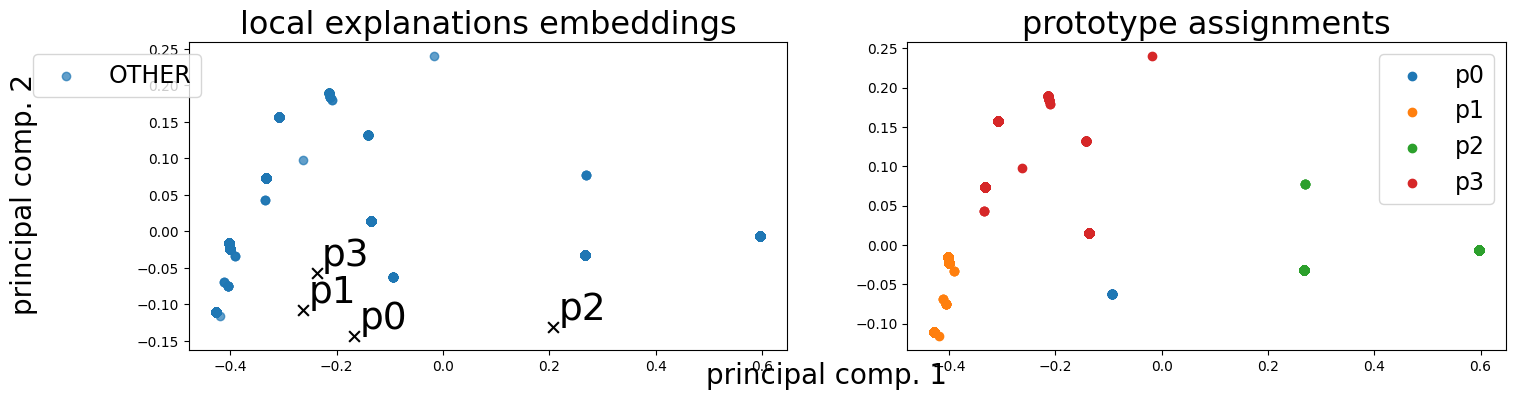

Alpha norms:
tensor([[0.2083, 1.0000, 0.1690, 0.1779],
        [0.5103, 1.0000, 0.3707, 0.4250]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([  25, 1165, 1846, 2984]))
Logic formulas:
For class 0:
0.9622277895548276 ((feature0000000002)
For class 1:
0.966852958180767 (feature0000000003) | (feature0000000001) | (feature0000000003 & feature0000000000)
Accuracy as classifier:  0.9622
LEN fidelity:  tensor(0.9622)

 80: Loss: 0.01926, LEN: 0.018983, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01931, V. LEN 0.017
 81: Loss: 0.01911, LEN: 0.018805, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01950, V. LEN 0.018
 82: Loss: 0.01880, LEN: 0.018579, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.02051, V. LEN 0.018
 83: Loss: 0.01899, LEN: 0.018687, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01931, V. LEN 0.018
 84: Loss: 0.01874, LEN: 0.018516, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01857, V. LEN 0.018
 85: Loss: 0.01866, LEN: 0.018429, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01973, V. LEN 

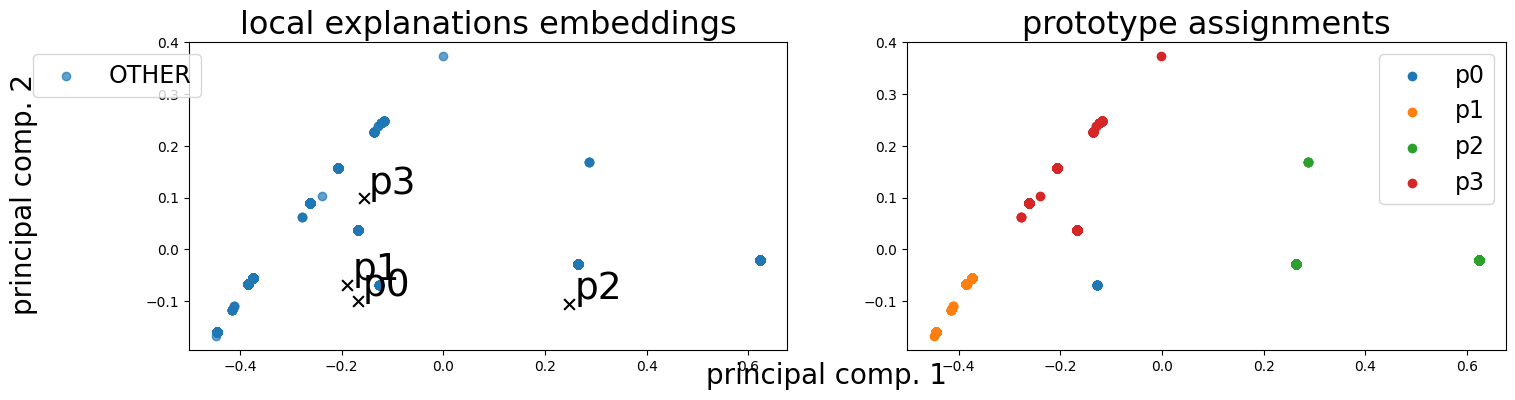

Alpha norms:
tensor([[0.2487, 1.0000, 0.1693, 0.1176],
        [0.6305, 1.0000, 0.3847, 0.4083]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([  25, 1165, 1846, 2984]))
Logic formulas:
For class 0:
0.9622277895548276 (feature0000000002)
For class 1:
0.966852958180767 (feature0000000003) | (feature0000000001) | (feature0000000003 & feature0000000000)
Accuracy as classifier:  0.9622
LEN fidelity:  tensor(0.9622)

100: Loss: 0.01864, LEN: 0.018418, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.02076, V. LEN 0.020
101: Loss: 0.01824, LEN: 0.017972, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.02131, V. LEN 0.020
102: Loss: 0.01804, LEN: 0.017805, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01684, V. LEN 0.016
103: Loss: 0.01848, LEN: 0.018156, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01699, V. LEN 0.016
104: Loss: 0.01879, LEN: 0.018543, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01796, V. LEN 0.017
105: Loss: 0.01783, LEN: 0.017576, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01726, V. LEN 0

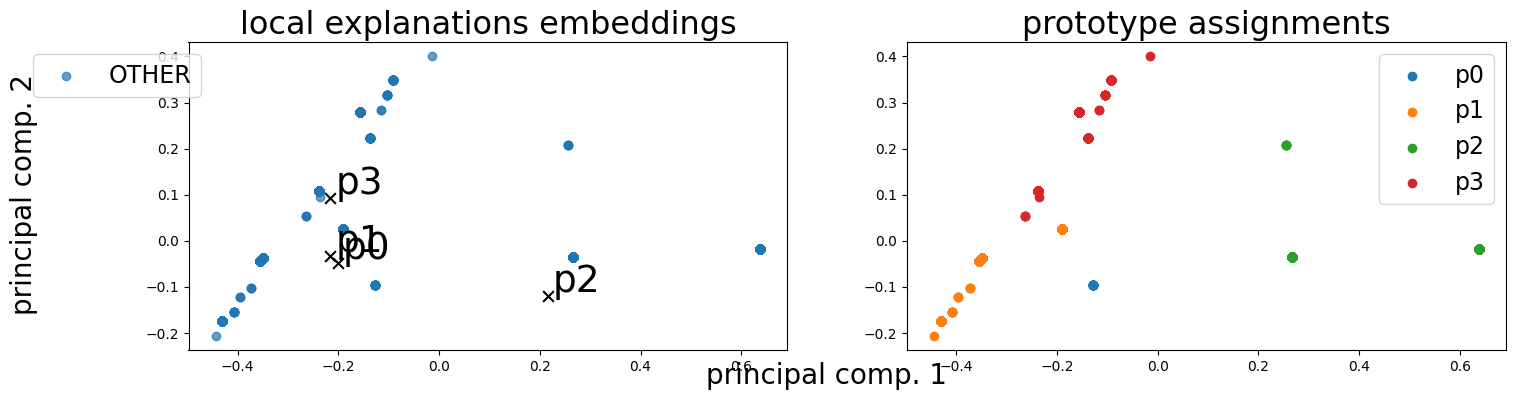

Alpha norms:
tensor([[0.2614, 1.0000, 0.1478, 0.0591],
        [0.6941, 1.0000, 0.3870, 0.3520]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([  25, 3681, 1846,  468]))
Logic formulas:
For class 0:
0.9622277895548276 (feature0000000002)
For class 1:
0.9676238196184236 (feature0000000001) | ((feature0000000003) | ((feature0000000003 & feature0000000000)
Accuracy as classifier:  0.9622
LEN fidelity:  tensor(0.9622)

120: Loss: 0.01810, LEN: 0.017860, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01890, V. LEN 0.018
121: Loss: 0.01814, LEN: 0.017891, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01872, V. LEN 0.018
122: Loss: 0.01803, LEN: 0.017755, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01919, V. LEN 0.019
123: Loss: 0.01819, LEN: 0.017911, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01841, V. LEN 0.018
124: Loss: 0.01771, LEN: 0.017461, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01708, V. LEN 0.016
125: Loss: 0.01835, LEN: 0.018073, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01939, V. LE

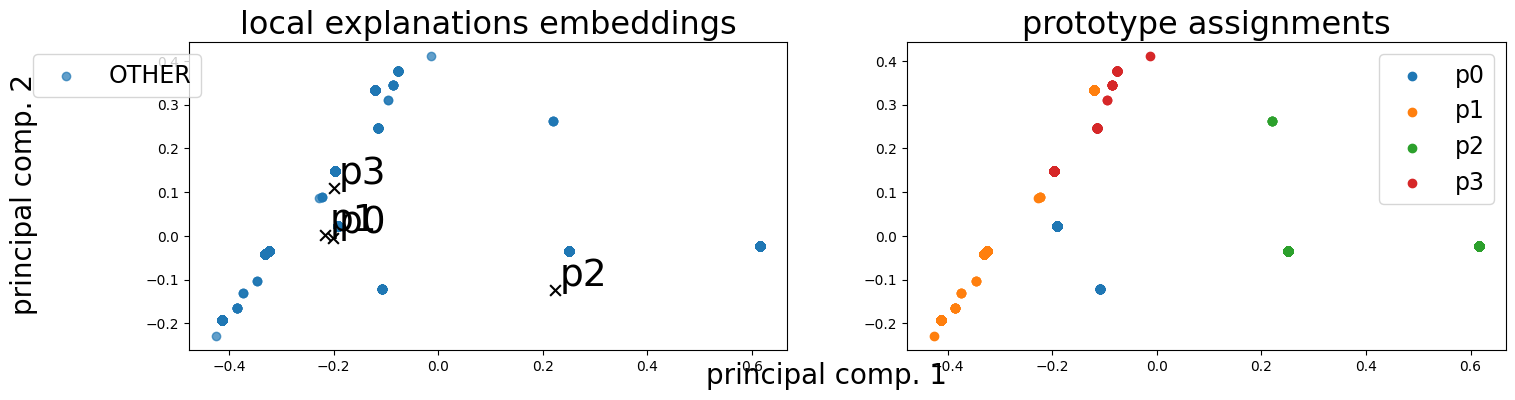

Alpha norms:
tensor([[0.3111, 1.0000, 0.1372, 0.0447],
        [0.7154, 1.0000, 0.3649, 0.2893]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([2541, 1310, 1846,  323]))
Logic formulas:
For class 0:
0.9622277895548276 (feature0000000002)
For class 1:
0.9633840817113124 (feature0000000000) | (feature0000000001) | ((feature0000000003) | (feature0000000000 & feature0000000001)
Accuracy as classifier:  0.9622
LEN fidelity:  tensor(0.9622)

140: Loss: 0.01769, LEN: 0.017424, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01886, V. LEN 0.018
141: Loss: 0.01746, LEN: 0.017150, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.02019, V. LEN 0.019
142: Loss: 0.01744, LEN: 0.017136, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01672, V. LEN 0.016
143: Loss: 0.01747, LEN: 0.017207, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01667, V. LEN 0.016
144: Loss: 0.01746, LEN: 0.017165, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01678, V. LEN 0.016
145: Loss: 0.01732, LEN: 0.017063, Acc: 0.97, V. Acc: 0.97, V.

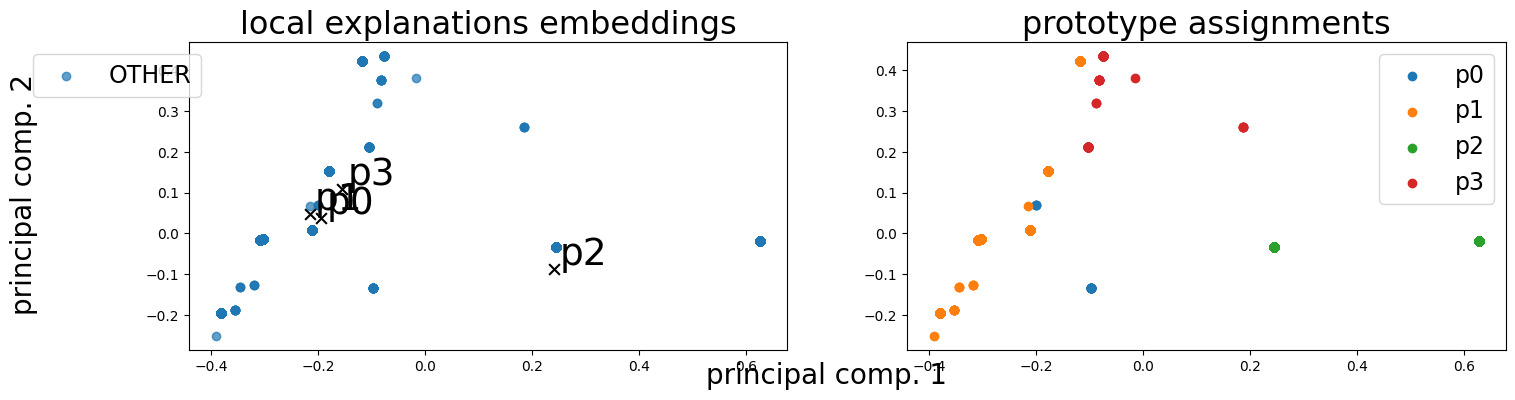

Alpha norms:
tensor([[0.2634, 1.0000, 0.1095, 0.0501],
        [0.6579, 1.0000, 0.3153, 0.2545]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([  28, 4029, 1842,  121]))
Logic formulas:
For class 0:
0.9560608980535749 (feature0000000002) | ((feature0000000003)
For class 1:
0.957602620928888 (feature0000000001) | (feature0000000000)
Accuracy as classifier:  0.9561
LEN fidelity:  tensor(0.9561)

160: Loss: 0.01720, LEN: 0.016974, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01742, V. LEN 0.017
161: Loss: 0.01770, LEN: 0.017483, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01730, V. LEN 0.017
162: Loss: 0.01739, LEN: 0.017062, Acc: 0.97, V. Acc: 0.93, V. Loss: 0.02082, V. LEN 0.020
163: Loss: 0.01768, LEN: 0.017404, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01677, V. LEN 0.016
164: Loss: 0.01750, LEN: 0.017217, Acc: 0.96, V. Acc: 0.92, V. Loss: 0.02064, V. LEN 0.020
165: Loss: 0.01788, LEN: 0.017554, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01645, V. LEN 0.016
166: Loss: 0.0

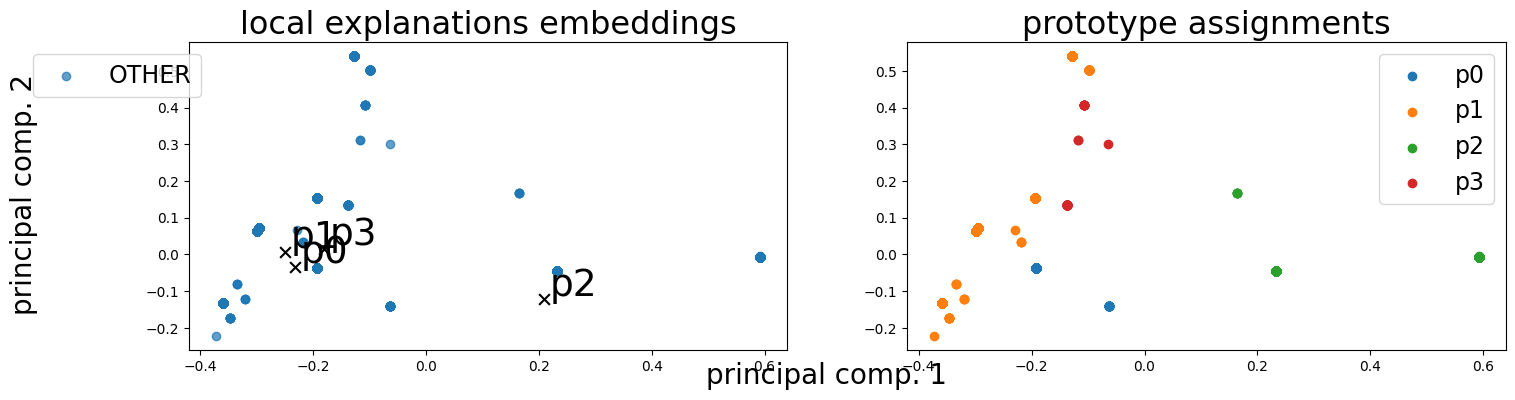

Alpha norms:
tensor([[0.1949, 1.0000, 0.0865, 0.0541],
        [0.5803, 1.0000, 0.2853, 0.2815]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([2541, 1574, 1846,   59]))
Logic formulas:
For class 0:
0.9672383888995953 (feature0000000002) | ((feature0000000003)
For class 1:
0.9685873964154943 (feature0000000001) | (feature0000000000) | (feature0000000000 & feature0000000001)
Accuracy as classifier:  0.9672
LEN fidelity:  tensor(0.9672)

180: Loss: 0.01666, LEN: 0.016400, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01630, V. LEN 0.016
181: Loss: 0.01639, LEN: 0.016158, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01614, V. LEN 0.016
182: Loss: 0.01664, LEN: 0.016435, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01676, V. LEN 0.016
183: Loss: 0.01688, LEN: 0.016613, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01532, V. LEN 0.014
184: Loss: 0.01723, LEN: 0.016895, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01677, V. LEN 0.016
185: Loss: 0.01700, LEN: 0.016772, Acc: 0.97, V. Acc: 0.97, V.

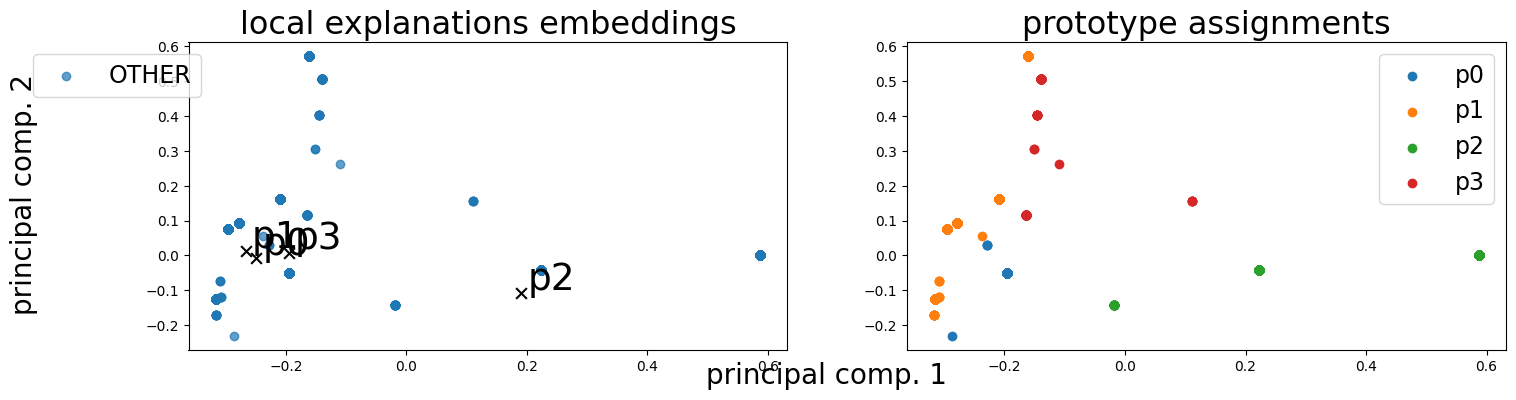

Alpha norms:
tensor([[0.2160, 1.0000, 0.0939, 0.0713],
        [0.6016, 1.0000, 0.3030, 0.3550]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([2520, 1512, 1867,  121]))
Logic formulas:
For class 0:
0.960300635960686 (feature0000000002) | ((feature0000000003)
For class 1:
0.9612642127577568 (feature0000000001) | (feature0000000000) | ((feature0000000002 & feature0000000000)
Accuracy as classifier:  0.9603
LEN fidelity:  tensor(0.9603)

200: Loss: 0.01624, LEN: 0.016021, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01557, V. LEN 0.015
201: Loss: 0.01640, LEN: 0.016154, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01799, V. LEN 0.017
202: Loss: 0.01721, LEN: 0.016783, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01562, V. LEN 0.015
203: Loss: 0.01605, LEN: 0.015808, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01438, V. LEN 0.014
204: Loss: 0.01653, LEN: 0.016319, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01568, V. LEN 0.015
205: Loss: 0.01622, LEN: 0.016011, Acc: 0.97, V. Acc: 0.97, V.

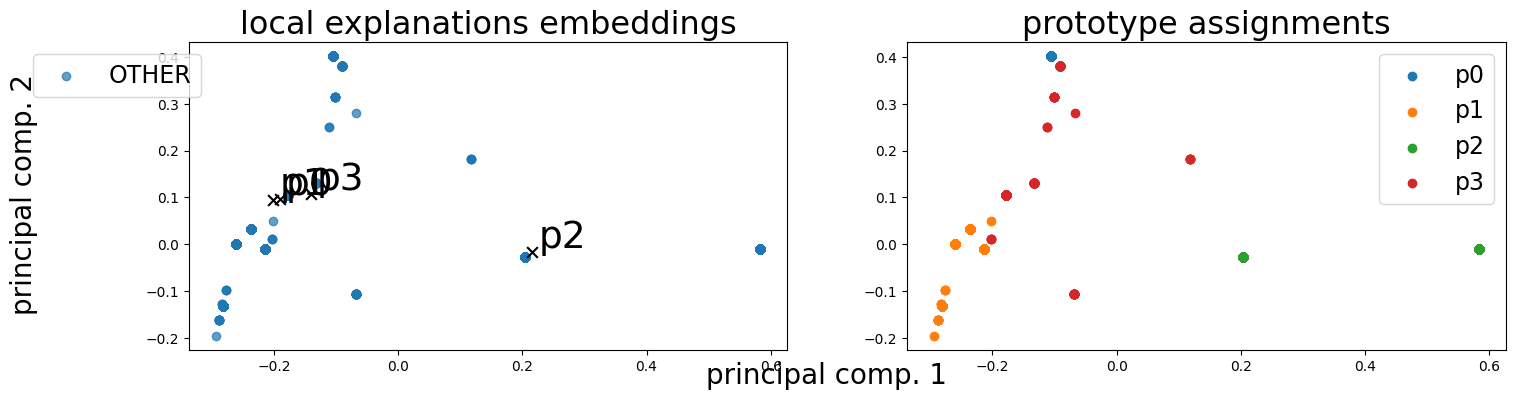

Alpha norms:
tensor([[0.2601, 1.0000, 0.1111, 0.1095],
        [0.6467, 1.0000, 0.3318, 0.5046]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([ 141, 3682, 1842,  355]))
Logic formulas:
For class 0:
0.9211794179996146 (feature0000000002) | ((feature0000000003) | ((feature0000000003 & feature0000000002)
For class 1:
0.9223357101560994 (feature0000000001) | (feature0000000000)
Accuracy as classifier:  0.9212
LEN fidelity:  tensor(0.9212)

220: Loss: 0.01745, LEN: 0.017234, Acc: 0.96, V. Acc: 0.93, V. Loss: 0.02140, V. LEN 0.021
221: Loss: 0.01639, LEN: 0.016162, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01609, V. LEN 0.016
222: Loss: 0.01659, LEN: 0.016322, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01618, V. LEN 0.016
223: Loss: 0.01655, LEN: 0.016328, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01671, V. LEN 0.016
224: Loss: 0.01724, LEN: 0.016901, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01511, V. LEN 0.014
225: Loss: 0.01598, LEN: 0.015788, Acc: 0.97, V. Acc: 0.97, V

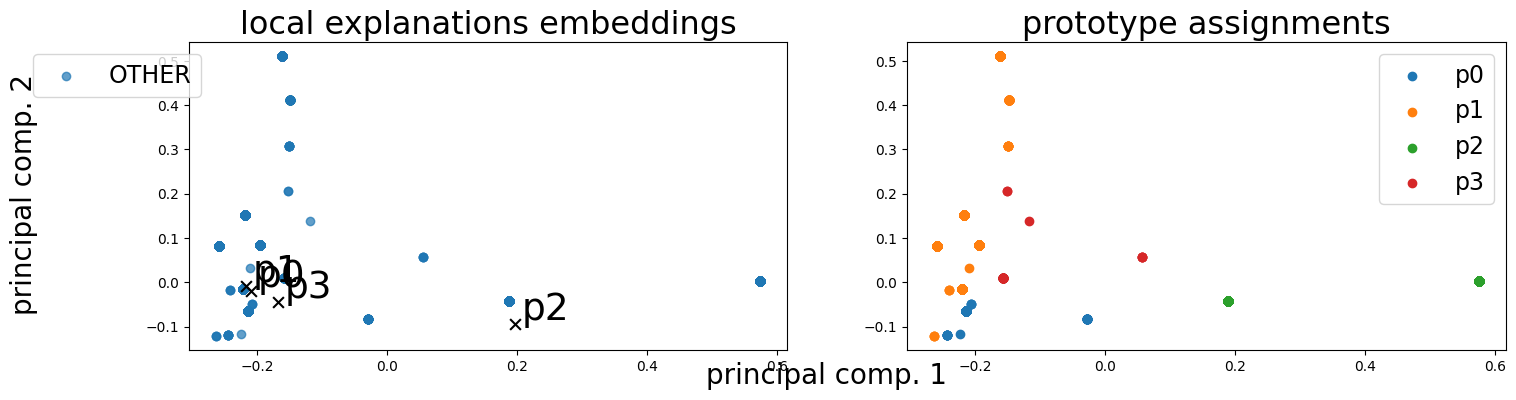

Alpha norms:
tensor([[0.2014, 1.0000, 0.1010, 0.0811],
        [0.5733, 1.0000, 0.3327, 0.5313]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([2553, 1570, 1842,   55]))
Logic formulas:
For class 0:
0.9687801117749084 (feature0000000002) | ((feature0000000003)
For class 1:
0.9701291192908075 (feature0000000001) | (feature0000000000)
Accuracy as classifier:  0.9688
LEN fidelity:  tensor(0.9688)

240: Loss: 0.01589, LEN: 0.015739, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01554, V. LEN 0.015
241: Loss: 0.01644, LEN: 0.016262, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01616, V. LEN 0.016
242: Loss: 0.01721, LEN: 0.016946, Acc: 0.96, V. Acc: 0.97, V. Loss: 0.01645, V. LEN 0.016
243: Loss: 0.01646, LEN: 0.016263, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01461, V. LEN 0.014
244: Loss: 0.01630, LEN: 0.016142, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01403, V. LEN 0.014
245: Loss: 0.01617, LEN: 0.016010, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01474, V. LEN 0.015
246: Loss: 0.

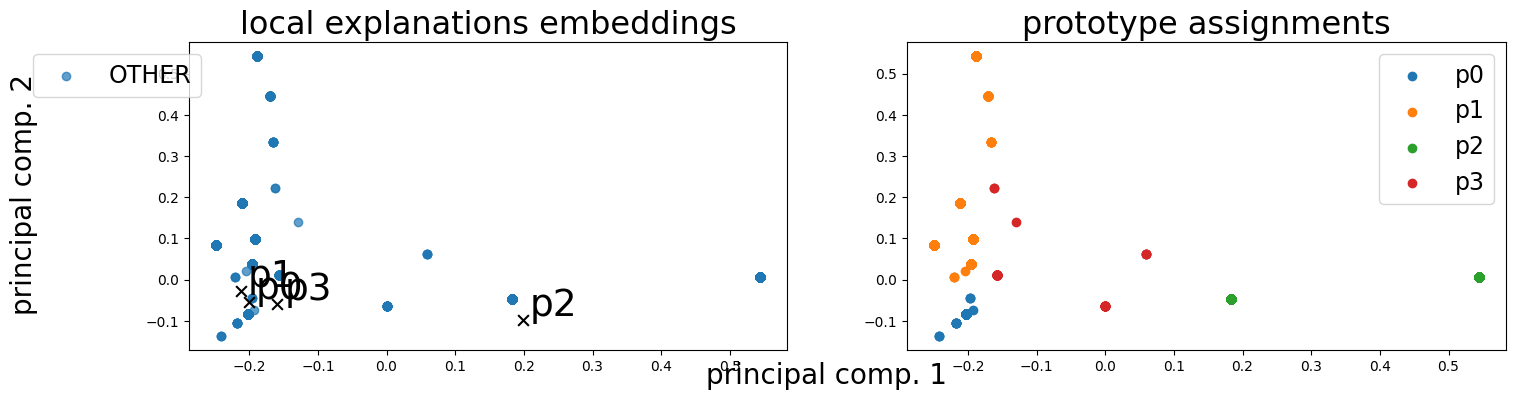

Alpha norms:
tensor([[0.2509, 1.0000, 0.1320, 0.0912],
        [0.6375, 1.0000, 0.3749, 0.5996]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([2531, 1567, 1842,   80]))
Logic formulas:
For class 0:
0.9730198496820197 (feature0000000002) | ((feature0000000003) | ((feature0000000003 & feature0000000002)
For class 1:
0.973405280400848 (feature0000000001) | (feature0000000000) | (feature0000000003 & feature0000000000)
Accuracy as classifier:  0.973
LEN fidelity:  tensor(0.9730)


260: Loss: 0.01572, LEN: 0.015570, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01452, V. LEN 0.014
261: Loss: 0.01614, LEN: 0.015977, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01481, V. LEN 0.014
262: Loss: 0.01616, LEN: 0.015967, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01489, V. LEN 0.014
263: Loss: 0.01651, LEN: 0.016341, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01446, V. LEN 0.014
264: Loss: 0.01589, LEN: 0.015691, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01429, V. LEN 0.014
265: Loss: 0.01596, 

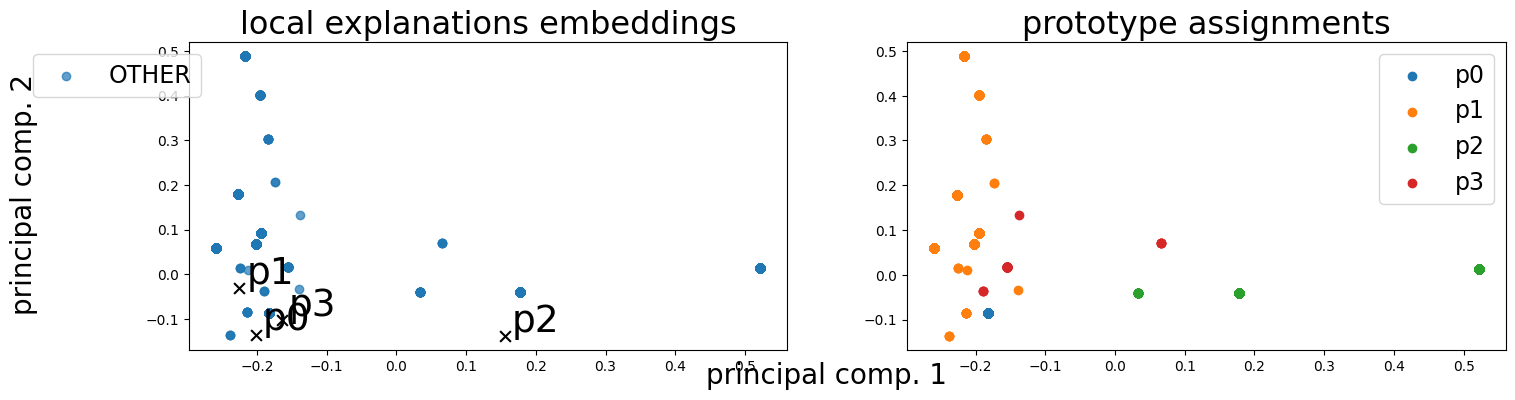

Alpha norms:
tensor([[0.1300, 1.0000, 0.0801, 0.0767],
        [0.4669, 1.0000, 0.2966, 0.6444]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([2516, 1581, 1867,   56]))
Logic formulas:
For class 0:
0.9737907111196762 (feature0000000002) | ((feature0000000003)
For class 1:
0.9749470032761611 (feature0000000001) | (feature0000000000)
Accuracy as classifier:  0.9736
LEN fidelity:  tensor(0.9736)

280: Loss: 0.01520, LEN: 0.015023, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01507, V. LEN 0.014
281: Loss: 0.01557, LEN: 0.015370, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01391, V. LEN 0.014
282: Loss: 0.01565, LEN: 0.015488, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01417, V. LEN 0.014
283: Loss: 0.01567, LEN: 0.015513, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01506, V. LEN 0.014
284: Loss: 0.01531, LEN: 0.015159, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01403, V. LEN 0.014
285: Loss: 0.01530, LEN: 0.015173, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01502, V. LEN 0.014
286: Loss: 0.

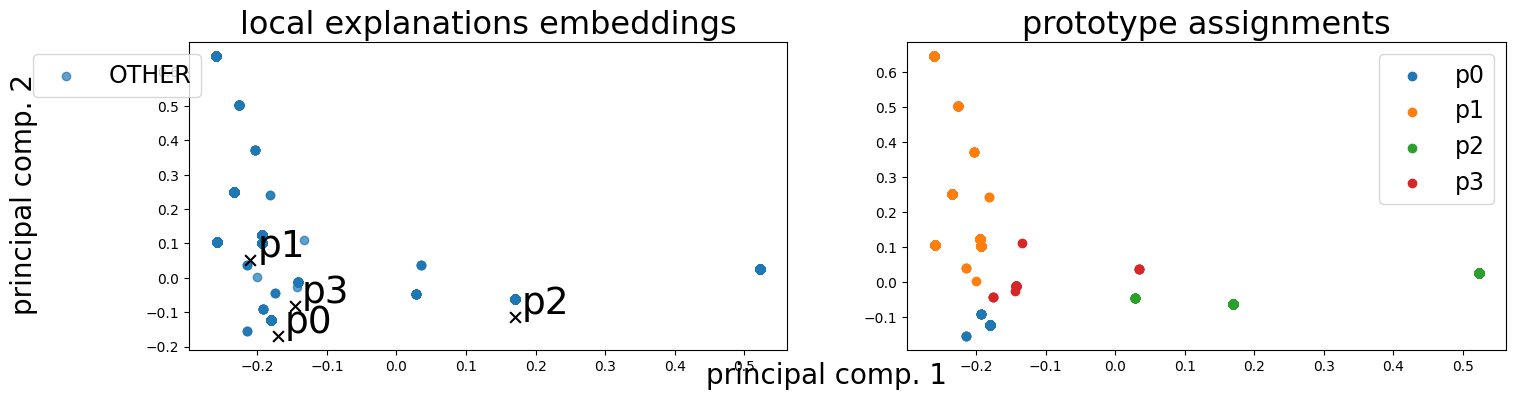

Alpha norms:
tensor([[0.0868, 1.0000, 0.0556, 0.0702],
        [0.3868, 1.0000, 0.2524, 0.6944]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([2527, 1569, 1867,   57]))
Logic formulas:
For class 0:
0.9739834264790904 ((feature0000000002) | (feature0000000003)
For class 1:
0.9751397186355752 (feature0000000001) | (feature0000000000)
Accuracy as classifier:  0.9738
LEN fidelity:  tensor(0.9738)

300: Loss: 0.01508, LEN: 0.014915, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01389, V. LEN 0.013
301: Loss: 0.01568, LEN: 0.015479, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01520, V. LEN 0.014
302: Loss: 0.01554, LEN: 0.015327, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01573, V. LEN 0.014
303: Loss: 0.01498, LEN: 0.014772, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01516, V. LEN 0.014
304: Loss: 0.01527, LEN: 0.015076, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01405, V. LEN 0.014
305: Loss: 0.01511, LEN: 0.014934, Acc: 0.97, V. Acc: 0.97, V. Loss: 0.01389, V. LEN 0.014
306: Loss: 0.

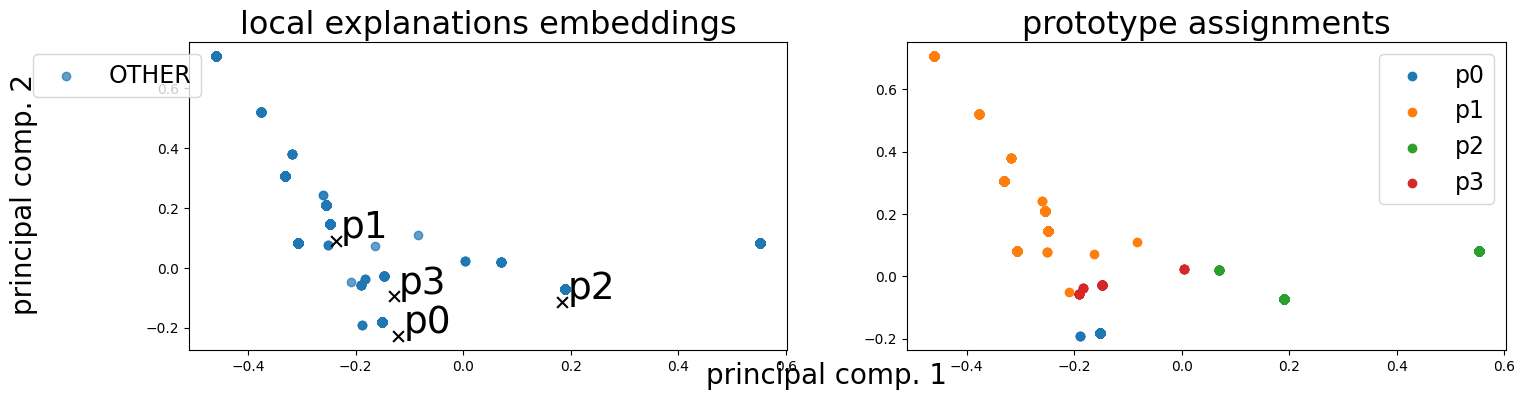

Alpha norms:
tensor([[0.0748, 1.0000, 0.0539, 0.0691],
        [0.3673, 1.0000, 0.2473, 0.6995]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([2519, 1571, 1867,   63]))
Logic formulas:
For class 0:
0.9751397186355752 ((feature0000000002) | (feature0000000003)
For class 1:
0.9762960107920601 (feature0000000001) | (feature0000000000)
Accuracy as classifier:  0.9749
LEN fidelity:  tensor(0.9749)

320: Loss: 0.01461, LEN: 0.014446, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01333, V. LEN 0.013
321: Loss: 0.01524, LEN: 0.015071, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01316, V. LEN 0.013
322: Loss: 0.01556, LEN: 0.015412, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01319, V. LEN 0.013
323: Loss: 0.01480, LEN: 0.014676, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01324, V. LEN 0.013
324: Loss: 0.01486, LEN: 0.014724, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01332, V. LEN 0.013
325: Loss: 0.01537, LEN: 0.015207, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01358, V. LEN 0.013
326: Loss: 0.

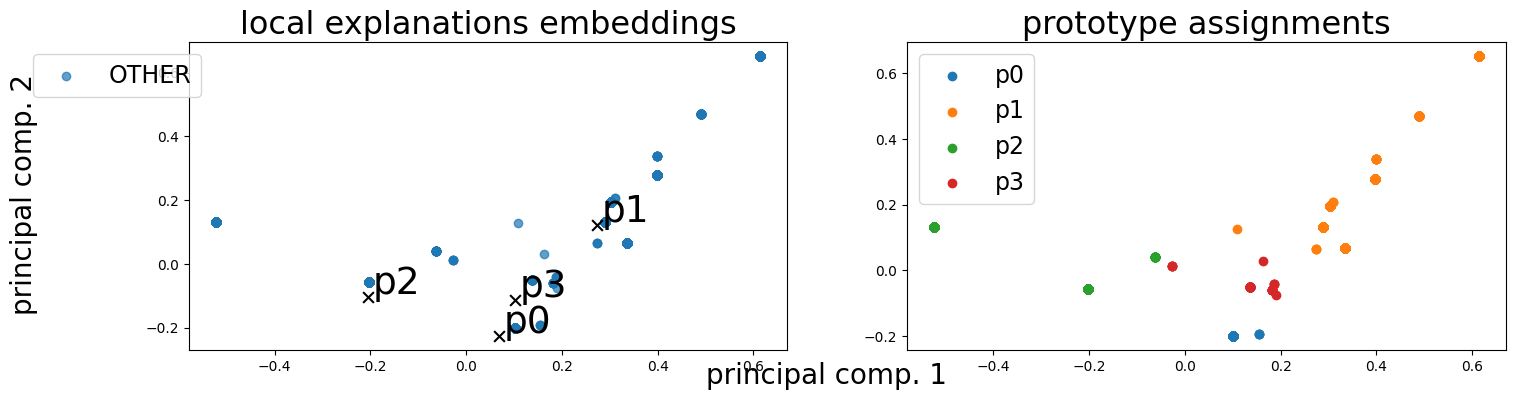

Alpha norms:
tensor([[0.0780, 1.0000, 0.0590, 0.0672],
        [0.3905, 1.0000, 0.2672, 0.7015]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([2519, 1569, 1867,   65]))
Logic formulas:
For class 0:
0.9755251493544036 ((feature0000000002) | (feature0000000003)
For class 1:
0.9766814415108884 (feature0000000001) | (feature0000000000)
Accuracy as classifier:  0.9753
LEN fidelity:  tensor(0.9753)

340: Loss: 0.01493, LEN: 0.014785, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01321, V. LEN 0.013
341: Loss: 0.01528, LEN: 0.015153, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01341, V. LEN 0.013
342: Loss: 0.01499, LEN: 0.014841, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01358, V. LEN 0.013
343: Loss: 0.01491, LEN: 0.014751, Acc: 0.97, V. Acc: 0.67, V. Loss: 0.04128, V. LEN 0.040
344: Loss: 0.01468, LEN: 0.014530, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01335, V. LEN 0.013
345: Loss: 0.01472, LEN: 0.014559, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01312, V. LEN 0.013
346: Loss: 0.

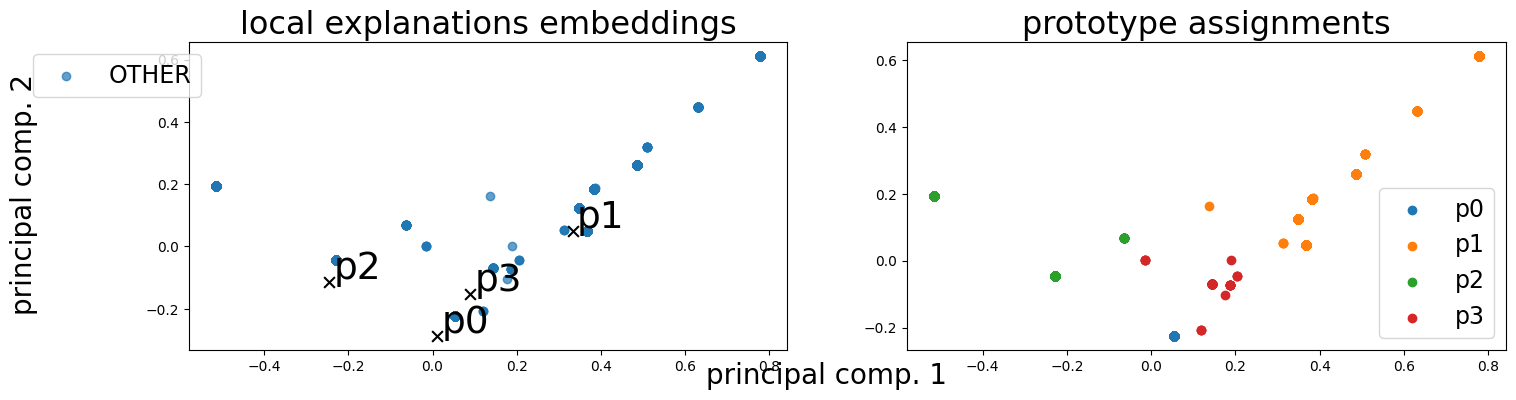

Alpha norms:
tensor([[0.0790, 1.0000, 0.0654, 0.0663],
        [0.3999, 1.0000, 0.2827, 0.7340]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([2516, 1569, 1867,   68]))
Logic formulas:
For class 0:
0.976103295432646 ((feature0000000002) | (feature0000000003)
For class 1:
0.9770668722297167 (feature0000000001) | (feature0000000000)
Accuracy as classifier:  0.9759
LEN fidelity:  tensor(0.9759)

360: Loss: 0.01473, LEN: 0.014532, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01364, V. LEN 0.013
361: Loss: 0.01447, LEN: 0.014295, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01346, V. LEN 0.013
362: Loss: 0.01511, LEN: 0.014908, Acc: 0.96, V. Acc: 0.98, V. Loss: 0.01310, V. LEN 0.013
363: Loss: 0.01471, LEN: 0.014548, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01357, V. LEN 0.013
364: Loss: 0.01465, LEN: 0.014499, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01338, V. LEN 0.013
365: Loss: 0.01477, LEN: 0.014611, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01348, V. LEN 0.013
366: Loss: 0.0

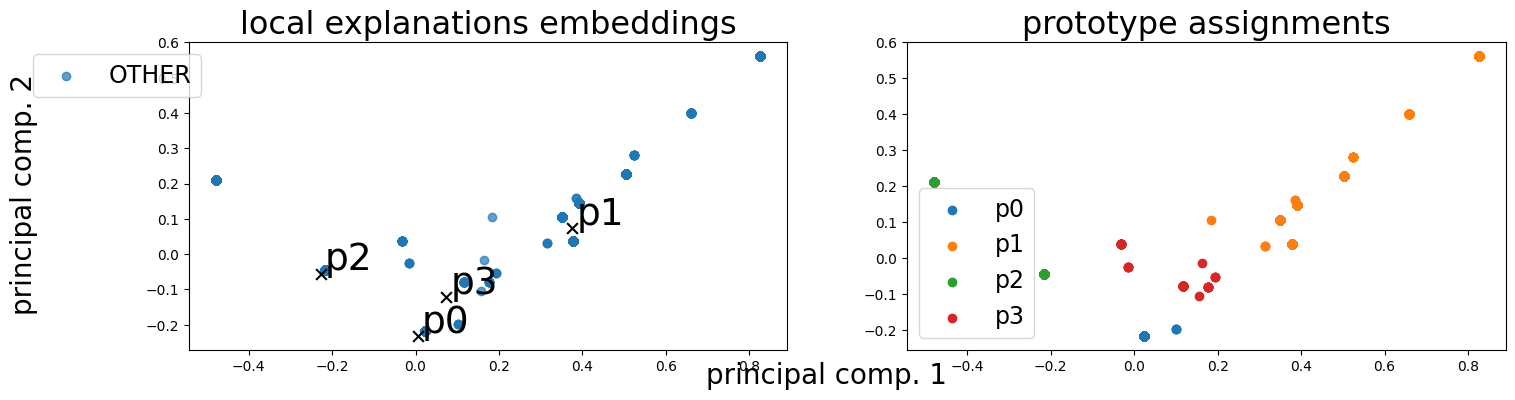

Alpha norms:
tensor([[0.0741, 1.0000, 0.0660, 0.0694],
        [0.3861, 1.0000, 0.2819, 0.7569]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([2519, 1569, 1842,   90]))
Logic formulas:
For class 0:
0.9753324339949894 (feature0000000003) | ((feature0000000002) | ((feature0000000002 & feature0000000003)
For class 1:
0.9766814415108884 (feature0000000001) | (feature0000000000)
Accuracy as classifier:  0.9753
LEN fidelity:  tensor(0.9753)

380: Loss: 0.01477, LEN: 0.014613, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01348, V. LEN 0.013
381: Loss: 0.01504, LEN: 0.014876, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01344, V. LEN 0.013
382: Loss: 0.01428, LEN: 0.014154, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01352, V. LEN 0.013
383: Loss: 0.01457, LEN: 0.014403, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01340, V. LEN 0.013
384: Loss: 0.01447, LEN: 0.014338, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01338, V. LEN 0.013
385: Loss: 0.01458, LEN: 0.014439, Acc: 0.97, V. Acc: 0.98, V

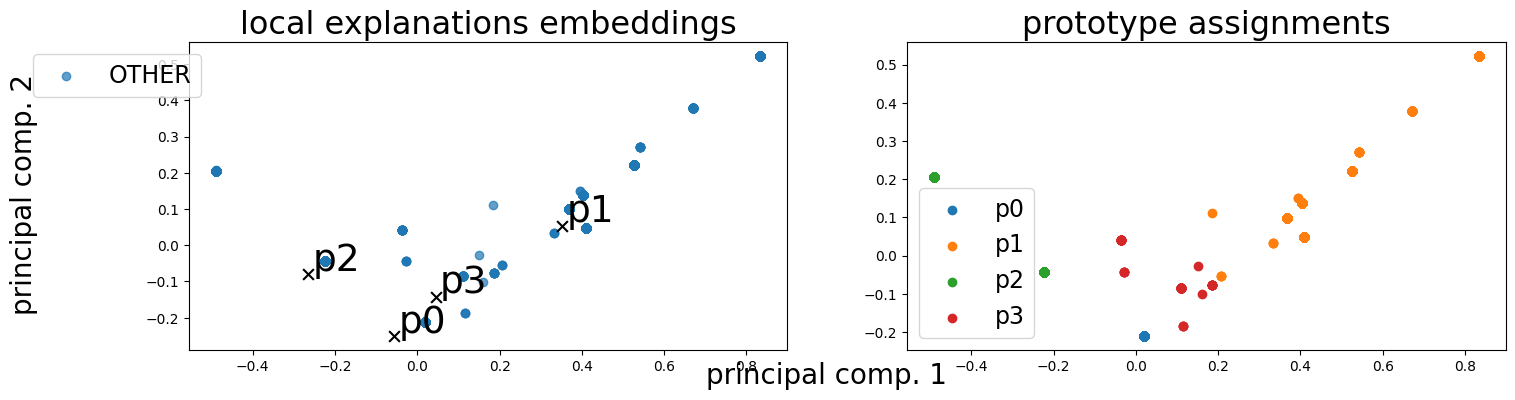

Alpha norms:
tensor([[0.0871, 1.0000, 0.0795, 0.0939],
        [0.4257, 1.0000, 0.3121, 0.9231]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([2516, 1572, 1842,   90]))
Logic formulas:
For class 0:
0.9757178647138177 (feature0000000003) | ((feature0000000002) | ((feature0000000002 & feature0000000003)
For class 1:
0.9766814415108884 (feature0000000001) | (feature0000000000) | (feature0000000003 & feature0000000001)
Accuracy as classifier:  0.9757
LEN fidelity:  tensor(0.9757)

400: Loss: 0.01451, LEN: 0.014369, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01350, V. LEN 0.013
401: Loss: 0.01520, LEN: 0.015027, Acc: 0.97, V. Acc: 0.67, V. Loss: 0.04218, V. LEN 0.042
402: Loss: 0.01449, LEN: 0.014361, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01313, V. LEN 0.013
403: Loss: 0.01452, LEN: 0.014379, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01345, V. LEN 0.013
404: Loss: 0.01492, LEN: 0.014739, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01323, V. LEN 0.013
405: Loss: 0.01465,

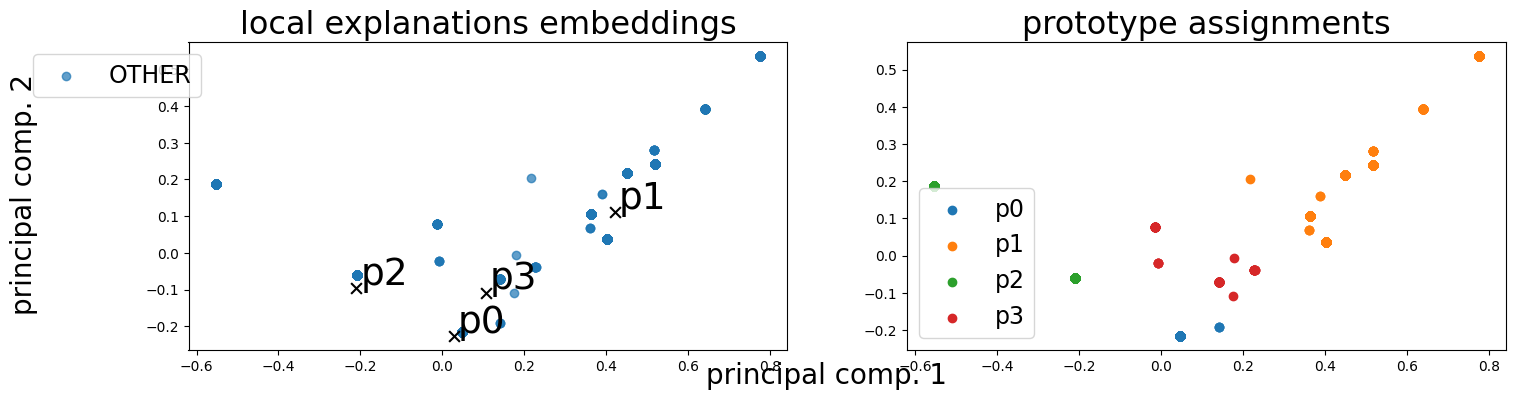

Alpha norms:
tensor([[0.0860, 1.0000, 0.0818, 0.1010],
        [0.4324, 1.0000, 0.3229, 0.9736]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([2519, 1569, 1842,   90]))
Logic formulas:
For class 0:
0.9753324339949894 (feature0000000003) | ((feature0000000002) | ((feature0000000002 & feature0000000003)
For class 1:
0.9766814415108884 (feature0000000001) | (feature0000000000)
Accuracy as classifier:  0.9753
LEN fidelity:  tensor(0.9753)

420: Loss: 0.01430, LEN: 0.014165, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01345, V. LEN 0.013
421: Loss: 0.01491, LEN: 0.014764, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01352, V. LEN 0.013
422: Loss: 0.01444, LEN: 0.014289, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01327, V. LEN 0.013
423: Loss: 0.01453, LEN: 0.014395, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01349, V. LEN 0.013
424: Loss: 0.01475, LEN: 0.014600, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01334, V. LEN 0.013
425: Loss: 0.01459, LEN: 0.014456, Acc: 0.97, V. Acc: 0.98, V

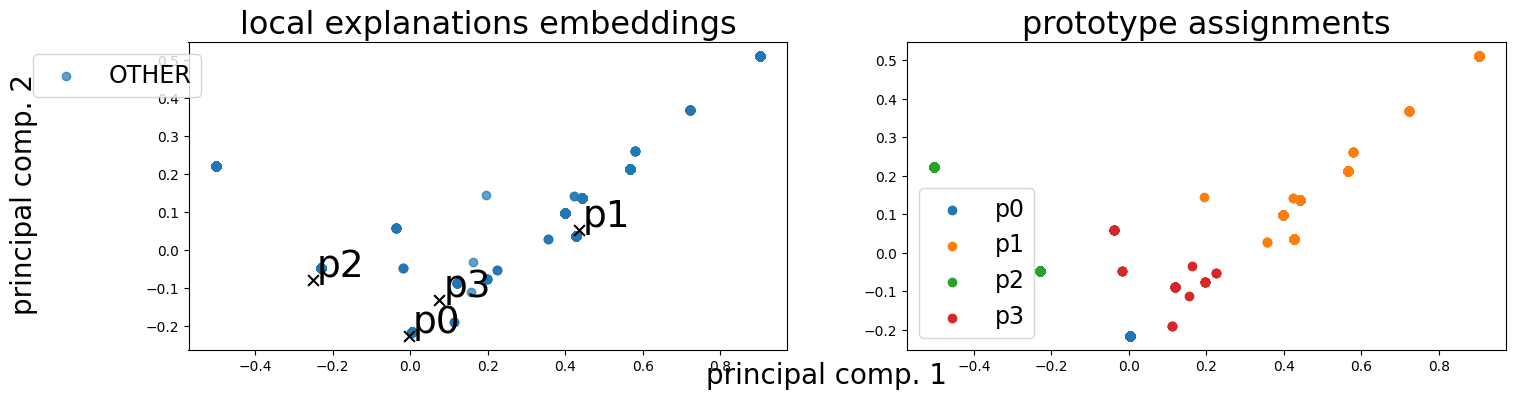

Alpha norms:
tensor([[0.0844, 1.0000, 0.0839, 0.1030],
        [0.4359, 0.9805, 0.3279, 1.0000]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([2516, 1569, 1842,   93]))
Logic formulas:
For class 0:
0.9759105800732318 (feature0000000003) | ((feature0000000002) | ((feature0000000002 & feature0000000003)
For class 1:
0.9770668722297167 (feature0000000001) | (feature0000000000)
Accuracy as classifier:  0.9759
LEN fidelity:  tensor(0.9759)

440: Loss: 0.01405, LEN: 0.013904, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01336, V. LEN 0.013
441: Loss: 0.01413, LEN: 0.013978, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01366, V. LEN 0.013
442: Loss: 0.01446, LEN: 0.014258, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01357, V. LEN 0.013
443: Loss: 0.01412, LEN: 0.013967, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01349, V. LEN 0.013
444: Loss: 0.01442, LEN: 0.014242, Acc: 0.97, V. Acc: 0.98, V. Loss: 0.01341, V. LEN 0.013
445: Loss: 0.01471, LEN: 0.014521, Acc: 0.97, V. Acc: 0.98, V

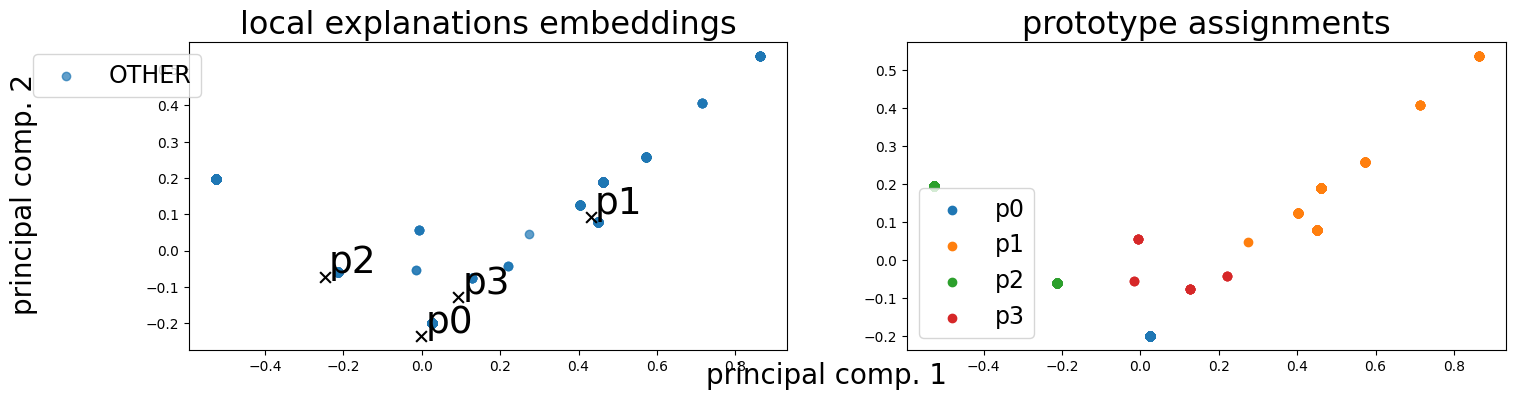

Alpha norms:
tensor([[0.0853, 1.0000, 0.0810, 0.0992],
        [0.4465, 0.9646, 0.3305, 1.0000]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([636, 376, 450,  16]))
Logic formulas:
For class 0:
0.9772191673212883 (feature0000000003) | ((feature0000000002) | ((feature0000000002 & feature0000000003)
For class 1:
0.9772191673212883 (feature0000000000) | (feature0000000001)
Accuracy as classifier:  0.9772
LEN fidelity:  tensor(0.9772)


In [6]:
expl.iterate(train_group_loader, test_group_loader, plot=True)
expl.inspect(test_group_loader)

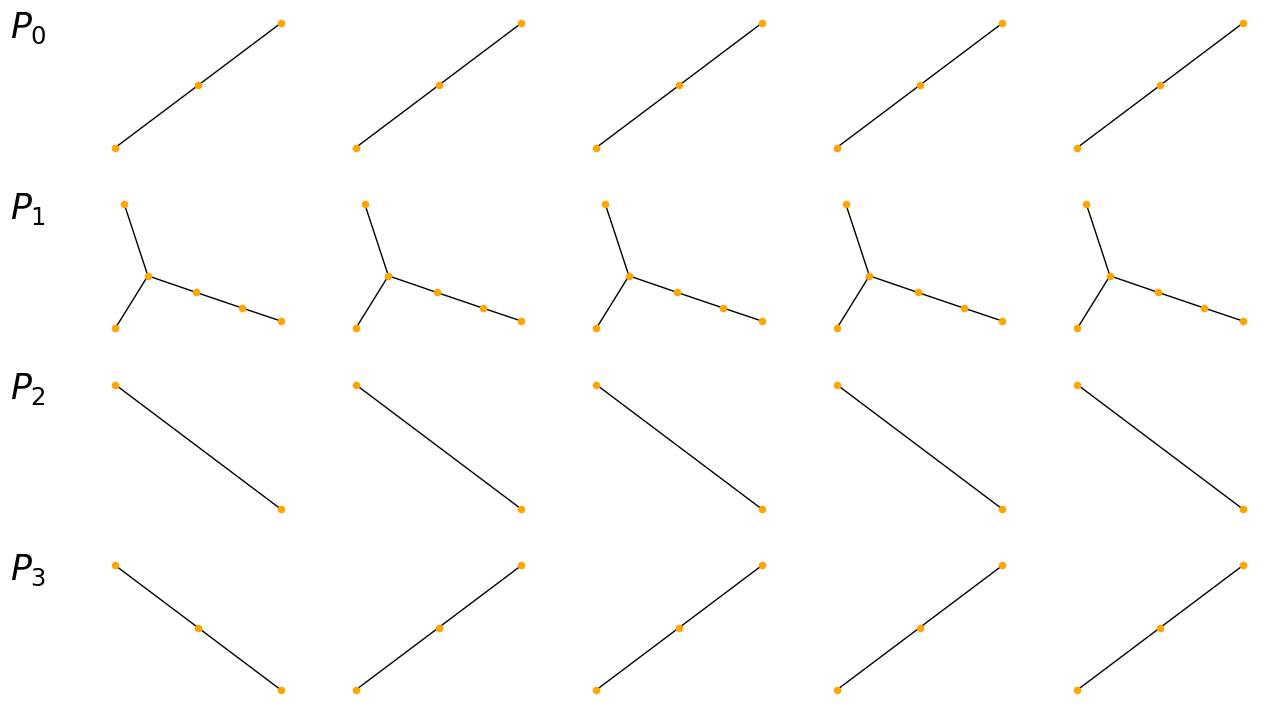

In [7]:
expl.hyper["assign_func"] = "sim"

x_train, emb, concepts_assignement, y_train_1h, le_classes, le_idxs, belonging = expl.get_concept_vector(
	test_group_loader,
	return_raw=True)
expl.hyper["assign_func"] = "discrete"

proto_names = {
	0: "BA",
	1: "Wheel",
	2: "Mix",
	3: "Grid",
	4: "House",
	5: "Grid",
}
torch.manual_seed(42)
fig = plt.figure(figsize=(15, 5 * 1.8))
n = 0
for p in range(expl.hyper["num_prototypes"]):
	idxs = le_idxs[concepts_assignement.argmax(-1) == p]
	# idxs = idxs[torch.randperm(len(idxs))]    # random
	sa = concepts_assignement[concepts_assignement.argmax(-1) == p]
	idxs = idxs[torch.argsort(sa[:, p], descending=True)]
	for ex in range(min(5, len(idxs))):
		n += 1
		ax = plt.subplot(expl.hyper["num_prototypes"], 5, n)
		G = to_networkx(dataset_test[int(idxs[ex])], to_undirected=True,
						remove_self_loops=True)
		pos = nx.spring_layout(G, seed=42)
		nx.draw(G, pos, node_size=20, ax=ax, node_color="orange")
		ax.axis("on")
		plt.box(False)

for p in range(expl.hyper["num_prototypes"]):
	plt.subplot(expl.hyper["num_prototypes"], 5, 5 * p + 1)
	plt.ylabel(f"$P_{p}$\n", size=25, rotation="horizontal",
			   labelpad=50)

plt.show()

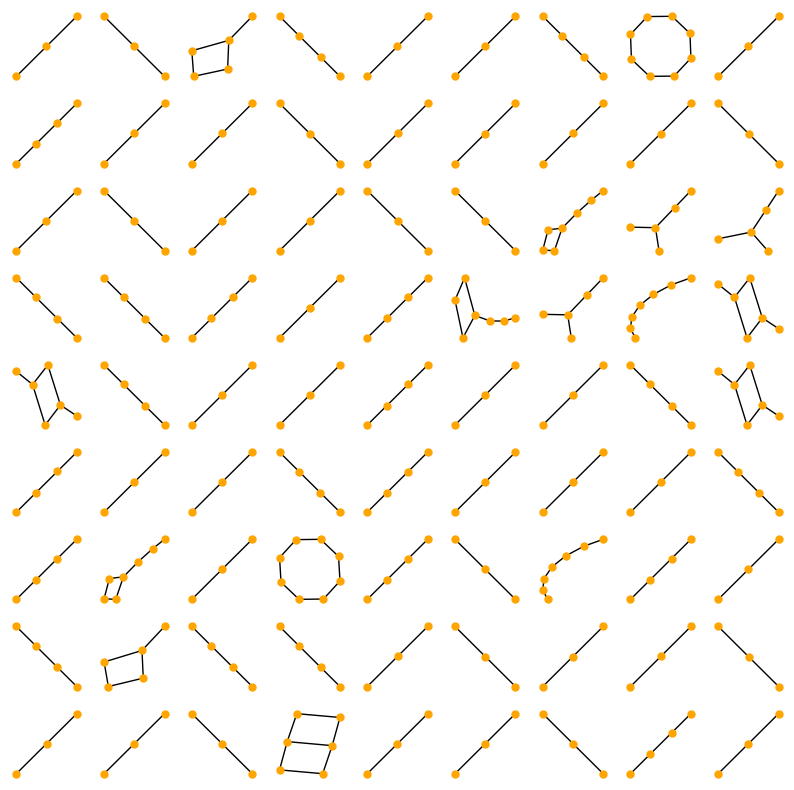

In [4]:
fig, axs = plt.subplots(9, 9, figsize=(10, 10))
axs = axs.flatten()

for i in range(81):
	G = nx.Graph(adjs_train[i], undirected=True)
	G.remove_edges_from(nx.selfloop_edges(G))
	pos = nx.spring_layout(G, seed=42)
	nx.draw(G, pos, ax=axs[i], node_color="orange", node_size=25)

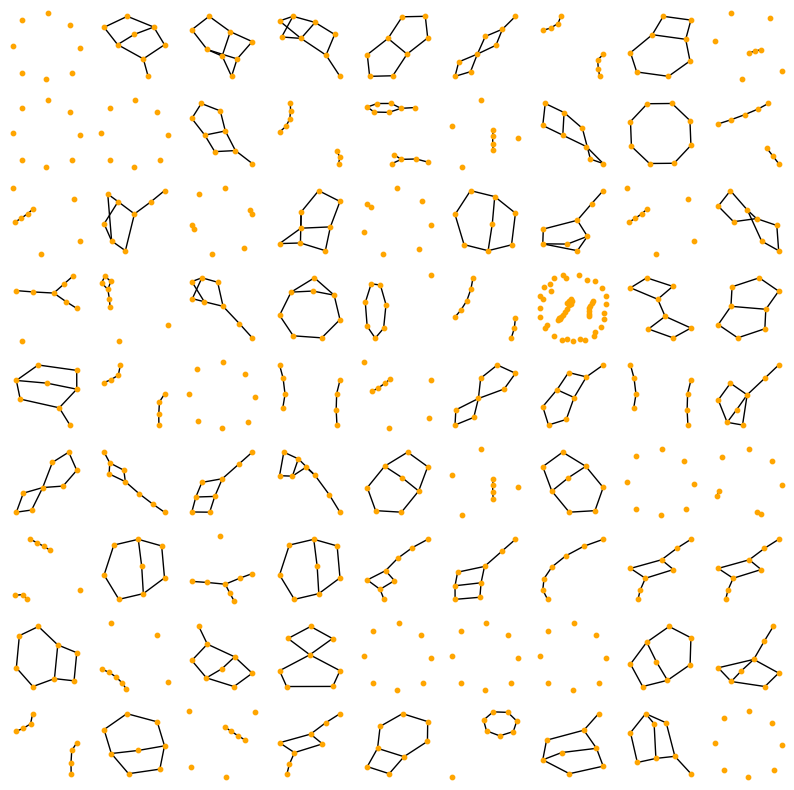

In [5]:
import numpy as np
data = np.load("local_features/PGExplainer/Distributive_weak/x_train.npz")
adjs = list(data.values())

fig, axs = plt.subplots(9, 9, figsize=(10, 10))
axs = axs.flatten()

for i in range(81):
	adj = adjs[i].squeeze()
	adj[adj > 0] = 1
	G = nx.Graph(adj, undirected=True)
	G.remove_edges_from(nx.selfloop_edges(G))
	pos = nx.spring_layout(G, seed=42)
	nx.draw(G, pos, ax=axs[i], node_color="orange", node_size=10)